# Unit 5 - Financial Planning


In [13]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [84]:
# Set current amount of crypto assets

BTC = 1.2
ETH = 5.3


In [ ]:
tickers = ["BTC", "ETH"]


In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [40]:
# Fetch current BTC price

response_data = requests.get(btc_url)
response_data_btc = response_data.json()

In [68]:
print(json.dumps(response_data_btc, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18703231,
            "total_supply": 18703231,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 57921.0,
                    "volume_24h": 64974675407,
                    "market_cap": 1083237247491,
                    "percentage_change_1h": -0.736873406169421,
                    "percentage_change_24h": 3.4594201245965,
                    "percentage_change_7d": 0.159712413998964,
                    "percent_change_1h": -0.736873406169421,
                    "percent_change_24h": 3.4594201245965,
                    "percent_change_7d": 0.159712413998964
                },
                "CAD": {
                    "price": 70287.1335,
                    "volume_24h": 78846768606.3945,
                    

In [74]:
btc_price = response_data_btc['data']['1']['quotes']['USD']['price']

In [81]:
btc_price

57921.0

In [88]:
btc_value = BTC * btc_price

In [89]:
btc_value

69505.2

In [78]:
# Fetch current ETH price
response_data = requests.get(eth_url)
response_data_eth = response_data.json()
print(json.dumps(response_data_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115785552,
            "total_supply": 115785552,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3533.42,
                    "volume_24h": 41919996210,
                    "market_cap": 409557242454,
                    "percentage_change_1h": -0.382767479757976,
                    "percentage_change_24h": 2.79878012095954,
                    "percentage_change_7d": 27.2524520647436,
                    "percent_change_1h": -0.382767479757976,
                    "percent_change_24h": 2.79878012095954,
                    "percent_change_7d": 27.2524520647436
                },
                "CAD": {
                    "price": 4287.80517,
                    "volume_24h": 50869915400.835,
                   

In [79]:
eth_price = response_data_eth['data']['1027']['quotes']['USD']['price']

In [80]:
eth_price

3533.42

In [90]:
eth_value = ETH * eth_price

In [91]:
eth_value 

18727.126

In [92]:
# Compute current value of my crpto

crypto_value = btc_value + eth_value 


In [124]:
crypto_value

88232.326

# Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [110]:
# Current amount of shares (SPY) and bonds(AGG)
my_spy = 50
my_agg = 200

In [104]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")

alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


In [141]:
# Format current date as ISO format

today = pd.Timestamp("2021-05-08", tz="Australia/Sydney").isoformat()


# Set the tickers
tickers = ["SPY","AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

shares_portfolio = alpaca.get_barset(tickers,timeframe,start = today, end = today).df

# Preview DataFrame

shares_portfolio

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-05-07 00:00:00-04:00  114.85  114.97  114.57  114.645  6812067  419.89   

                                                              
                              high     low   close    volume  
time                                                          
2021-05-07 00:00:00-04:00  422.815  419.16  422.09  58000019

In [111]:
# Pick AGG and SPY close prices

AGG_close_price = float(shares_portfolio["AGG"]["close"])
SPY_close_price = float(shares_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")

Current AGG closing price: $114.645
Current SPY closing price: $422.09


In [125]:
# Compute the current value of shares

my_agg_value = AGG_close_price * my_agg
my_spy_value = SPY_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21104.50
The current value of your 200 AGG shares is $22929.00


In [127]:
Total_share_value = my_agg_value + my_spy_value

### Savings Health Analysis

In [182]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
amount_data = {"Amount": [crypto_value, Total_share_value]}

df_savings = pd.DataFrame((amount_data),index = ['crypto','shares'])


# Display savings DataFrame
df_savings

,Amount
crypto,88232.326
shares,44033.500


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

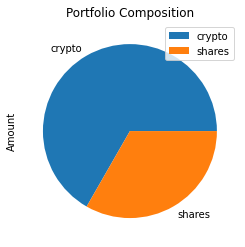

In [184]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Portfolio Composition")

<AxesSubplot:title={'center':'Current Value in Dollars of Total Portfolio'}>

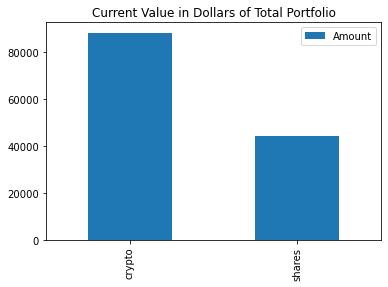

In [190]:
df_savings.plot.bar(title="Current Value in Dollars of Total Portfolio")

In [223]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = Total_share_value + crypto_value

# Validate saving health


if total_savings > emergency_fund:
    print('Congratulations you have enough money in this fund')

elif (total_savings == emergency_fund):
    print('Congratulations you have reached your financial goal')
    
elif (savings < emergency_fund):
    print('You are {("total_savings") - ("emergency_fund")} away from your goal')
        




Congratulations you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [130]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2016-05-08", tz="Australia/Sydney").isoformat()
end_date = pd.Timestamp('2021-05-08', tz="Australia/Sydney").isoformat()

In [140]:
# Get 5 years' worth of historical data for SPY and AGG

timeframe = "1D"

df_stock_data = alpaca.get_barset(tickers,timeframe,start = start_date, end = end_date, limit=1000).df

# Display sample data
df_stock_data

AGG                                           \
                             open      high       low     close     volume   
time                                                                         
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.5600  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.5500  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.5250  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.4400  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.2400  1194872.0   
...                           ...       ...       ...       ...        ...   
2021-05-03 00:00:00-04:00  114.40  114.5900  114.3300  114.4000  5537985.0   
2021-05-04 00:00:00-04:00  114.55  114.7000  114.4100  114.5285  4677045.0   
2021-05-05 00:00:00-04:00  114.45  114.6200  114.4222  114.6100  3861137.0   
2021-05-06 00:00:00-04:00  114.55  114.7100  114.5300  114.6500  4557111.0   
2021-05-07 00:00:00-04:00  114.85  114.9700  114.5700  114.6450  6812067.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-05-17 00:00:00-04:00     NaN      NaN      NaN     NaN         NaN  
2017-05-18 00:00:00-04:00  235.70  237.750  235.430  236.67  82965499.0  
2017-05-19 00:00:00-04:00  237.33  239.080  237.270  238.30  69366163.0  
2017-05-22 00:00:00-04:00  238.90  239.710  238.820  239.53  37630972.0  
2017-05-23 00:00:00-04:00  239.95  240.240  239.510  240.02  36771135.0  
...                           ...      ...      ...     ...         ...  
2021-05-03 00:00:00-04:00  419.43  419.840  417.665  418.18  60956273.0  
2021-05-04 00:00:00-04:00  416.08  416.600  411.670  415.64  88484568.0  
2021-05-05 00:00:00-04:00  417.38  417.630  414.940  415.72  51316402.0  
2021-05-06 00:00:00-04:00  415.83  419.210  413.675  419.08  65397203.0  
2021-05-07 00:00:00-04:00  419.89  422.815  419.160  422.09  58002195.0  

[1001 rows x 10 columns]

In [224]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns and a 60% stock / 40% bond portfolio 

?MCSimulation

# Set number of simulations
#num_simulations = 500
tickers = ["SPY","AGG"]

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [225]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                    
                               volume daily_return  
time                                                
2017-05-17 00:00:00-04:00         NaN          NaN  
2017-05-18 00:00:00-04:00  82965499.0          NaN  
2017-05-19 00:00:00-04:00  69366163.0     0.006887  
2017-05-22 00:00:00-04:00  37630972.0     0.005162  
2017-05-23 00:00:00-04:00  36771135.0     0.002046

In [226]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005652,0.996638,0.989727,0.997482,1.009071,0.999017,0.996320,1.001754,0.983941,1.004728,...,0.984841,1.005635,0.992987,0.997290,1.003145,0.998230,1.004309,1.008094,1.007472,0.998597
2,0.998376,1.005489,0.991461,0.999302,1.017667,0.995090,1.001821,1.007876,0.986775,1.001540,...,0.981020,1.005740,0.987430,1.010025,0.997537,0.989988,1.000773,1.007331,1.009419,0.975909
3,1.003600,0.993359,0.988168,1.005845,1.018977,1.004253,1.009576,1.016285,0.990570,1.006351,...,0.985432,0.999295,0.986791,1.016039,0.990477,1.003764,1.007307,1.001937,1.003869,0.980691
4,1.000287,1.007645,0.980316,1.004153,1.021896,1.012246,1.009113,1.008632,0.985862,0.992454,...,1.002500,0.992387,0.995071,1.014510,0.990293,0.993490,1.004459,1.010156,0.998282,0.981118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.223128,6.924597,16.862571,60.504583,49.277054,15.707057,25.266481,12.478915,30.046756,6.156823,...,17.101311,86.877204,13.101110,27.963242,34.302013,46.077361,24.027092,8.019453,15.614116,12.251614
7557,10.259510,6.917382,16.974361,60.994436,50.040418,15.609143,25.063083,12.501911,30.025046,6.223011,...,17.259518,87.403301,13.135394,27.641030,34.266480,46.628837,24.116253,7.999343,15.726604,12.202492
7558,10.254347,6.943017,16.915780,60.718171,50.017299,15.598906,25.513061,12.577355,30.189415,6.202001,...,17.007416,88.109834,13.008121,27.599929,33.770446,47.141423,24.210126,7.975579,15.801844,12.242203
7559,10.192896,6.933816,16.833884,60.713561,50.213253,15.622833,25.380618,12.484779,30.149808,6.187610,...,16.779119,89.161040,12.929363,27.434804,33.591697,46.878434,23.824674,7.962323,15.698235,12.405852


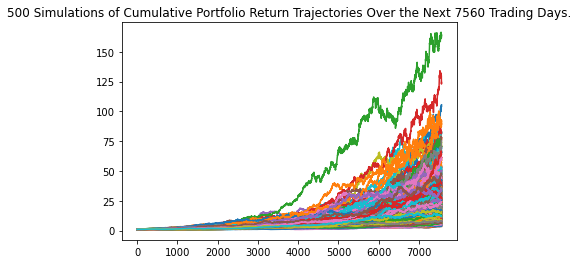

In [227]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

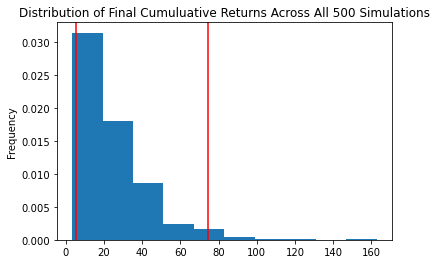

In [228]:
# Plot probability distribution and confidence intervals

dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [230]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean             24.622629
std              18.768412
min               3.415375
25%              11.457406
50%              19.331215
75%              32.618843
max             162.676014
95% CI Lower      5.465153
95% CI Upper     74.553859
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [231]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*20000,2)
ci_upper = round(summary_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $109303.05 and $1491077.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [232]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl[8]*20000*1.5,2)
ci_upper = round(summary_tbl[9]*20000*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $163954.58 and $2236615.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [233]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns and 70% stock and 30% bond split
MC_dist_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [234]:
# Printing the simulation input data

MC_dist_fiveyears.portfolio_data.head()


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                    
                               volume daily_return  
time                                                
2017-05-17 00:00:00-04:00         NaN          NaN  
2017-05-18 00:00:00-04:00  82965499.0          NaN  
2017-05-19 00:00:00-04:00  69366163.0     0.006887  
2017-05-22 00:00:00-04:00  37630972.0     0.005162  
2017-05-23 00:00:00-04:00  36771135.0     0.002046

In [235]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_dist_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018611,0.995445,1.004008,1.007701,0.990785,0.987786,1.014389,0.981920,1.008680,0.990824,...,0.994210,0.985182,1.003365,0.987916,1.012131,0.988841,0.976957,1.001046,0.994172,0.983111
2,1.016064,0.990500,1.002649,1.022828,0.989579,0.980023,1.011725,0.970430,1.017416,0.990628,...,0.980086,0.964001,0.994258,1.002139,1.015025,1.003429,0.988210,1.001674,0.996641,0.982125
3,1.007654,0.990605,1.017708,1.015957,0.990133,0.991605,1.016433,0.959844,1.013093,0.986581,...,0.969861,0.959013,0.986359,1.004449,1.021913,1.012743,1.000486,1.011042,0.996842,0.989496
4,1.017708,0.990777,1.023081,1.012765,0.989783,0.983633,1.023714,0.949875,1.007971,0.997523,...,0.968423,0.958838,0.999601,1.018885,1.028807,1.001596,1.007201,1.000938,1.015657,0.983626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.380886,1.936072,2.091053,1.944323,2.008578,1.233347,2.606530,1.557636,1.575642,2.672027,...,1.210921,1.345507,2.593159,1.804709,1.717082,3.245031,1.622073,3.040752,2.571536,1.623492
1257,1.370657,1.919897,2.101084,1.935562,2.041673,1.221707,2.640997,1.541601,1.606995,2.659229,...,1.229643,1.365939,2.627425,1.766673,1.713789,3.243184,1.603892,3.055667,2.609353,1.589996
1258,1.362717,1.915953,2.094948,1.948435,2.008144,1.227159,2.665949,1.561991,1.630258,2.647691,...,1.221208,1.376040,2.629099,1.769294,1.696185,3.267909,1.615523,3.103809,2.608437,1.606817
1259,1.363460,1.929117,2.098933,1.942736,2.035671,1.222811,2.673361,1.562438,1.616267,2.674391,...,1.221591,1.379364,2.640260,1.763489,1.677352,3.270883,1.608269,3.092830,2.612308,1.603643


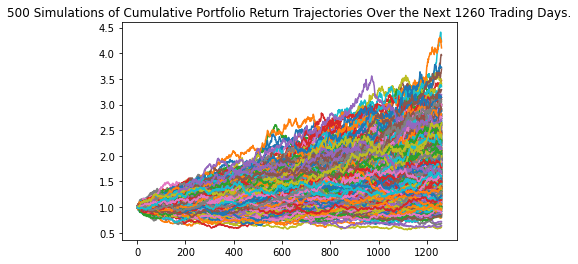

In [236]:
# Plot simulation outcomes
line_plot = MC_dist_fiveyears.plot_simulation()

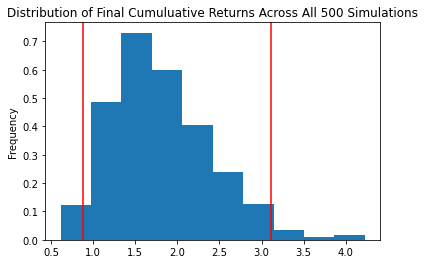

In [237]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist_fiveyears.plot_distribution()

In [238]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_fiveyears = MC_dist_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_fiveyears)

count           500.000000
mean              1.809509
std               0.595102
min               0.613204
25%               1.380613
50%               1.729145
75%               2.116031
max               4.227541
95% CI Lower      0.880143
95% CI Upper      3.117901
Name: 1260, dtype: float64


In [239]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl_fiveyears[8]*20000,2)
ci_upper = round(summary_tbl_fiveyears[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17602.87 and $62358.01


### Ten Years Retirement Option

In [240]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [241]:
MC_dist_tenyears.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                    
                               volume daily_return  
time                                                
2017-05-17 00:00:00-04:00         NaN          NaN  
2017-05-18 00:00:00-04:00  82965499.0          NaN  
2017-05-19 00:00:00-04:00  69366163.0     0.006887  
2017-05-22 00:00:00-04:00  37630972.0     0.005162  
2017-05-23 00:00:00-04:00  36771135.0     0.002046

In [242]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996410,1.000295,1.005964,1.014378,0.999070,0.992538,0.997281,0.985811,1.024649,0.987042,...,1.014015,0.997297,1.003988,0.996524,0.999702,0.992712,1.003992,0.994455,1.003510,0.996777
2,0.990906,0.987488,0.997176,1.004080,1.003515,0.996749,0.984181,0.969222,1.034083,0.977639,...,1.008040,1.003015,0.994984,0.998214,1.007162,0.995250,0.995534,0.979497,0.996587,0.992632
3,0.983033,0.977756,1.002034,1.003015,0.997203,0.997391,0.992821,0.964707,1.028272,0.982524,...,1.008738,1.005906,1.010390,0.997005,1.005281,1.011330,0.993035,0.972360,1.009784,0.998984
4,0.994068,0.987731,1.002962,1.010786,0.995941,0.998069,0.996230,0.969791,1.024721,0.976421,...,1.014984,1.001293,1.013292,0.995754,1.014600,1.014331,0.996290,0.953987,1.009637,0.997088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.946886,4.363808,4.678907,3.675735,2.736699,3.476094,5.404389,2.643305,2.496113,4.952420,...,4.107860,5.196855,1.583921,2.332935,1.347922,1.718043,3.929663,3.956057,3.735600,1.975962
2517,2.981165,4.361467,4.678387,3.639335,2.741703,3.423081,5.380218,2.653383,2.505926,5.032996,...,4.079283,5.275136,1.583872,2.345134,1.362343,1.694396,3.920875,3.945691,3.733319,1.991826
2518,2.959643,4.366167,4.672114,3.662819,2.741667,3.433472,5.330131,2.641287,2.492321,5.072599,...,3.997318,5.314097,1.582168,2.316009,1.356877,1.703030,3.876234,3.984849,3.737234,1.978056
2519,2.963730,4.348880,4.560908,3.666372,2.692758,3.443390,5.287270,2.643015,2.515870,5.059524,...,4.010546,5.363630,1.598872,2.324261,1.352482,1.736199,3.823508,3.993336,3.755039,1.966467


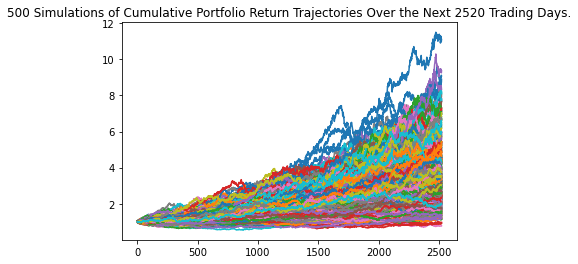

In [245]:
# Plot simulation outcomes
line_plot = MC_dist_tenyears.plot_simulation()


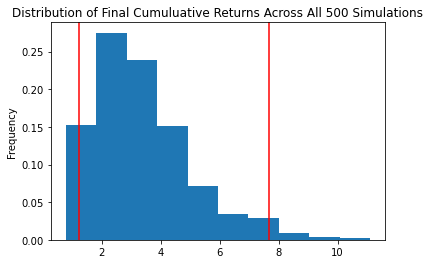

In [244]:
# Plot probability distribution and confidence intervals

dist_plot = MC_dist_tenyears.plot_distribution()

In [243]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_tenyears = MC_dist_tenyears.summarize_cumulative_return()


# Print summary statistics
print(summary_tbl_tenyears)

count           500.000000
mean              3.365175
std               1.648954
min               0.776951
25%               2.190933
50%               3.002166
75%               4.248162
max              11.099732
95% CI Lower      1.219788
95% CI Upper      7.674416
Name: 2520, dtype: float64


In [247]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl_tenyears[8]*20000,2)
ci_upper = round(summary_tbl_tenyears[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $24395.75 and $153488.33
